In [1]:
import pydynverse as pdv

logger = pdv.logger
logger.setLevel("DEBUG")

pdv.settings.backend = "python_function"


  _____       _____                                     
 |  __ \     |  __ \                                    
 | |__) |   _| |  | |_   _ _ ____   _____ _ __ ___  ___ 
 |  ___/ | | | |  | | | | | '_ \ \ / / _ \ '__/ __|/ _ \
 | |   | |_| | |__| | |_| | | | \ V /  __/ |  \__ \  __/
 |_|    \__, |_____/ \__, |_| |_|\_/ \___|_|  |___/\___|
         __/ |        __/ |                             
        |___/        |___/         



In [2]:
# 1. 准备数据(wrap)
dataset = pdv.data.load_simulation_data(data_filename="real/silver/fibroblast-reprogramming_treutlein.rds")
dataset

{'id': 'real/silver/fibroblast-reprogramming_treutlein',
 'cell_ids': ['1_iN1_C01',
  '1_iN1_C02',
  '1_iN1_C03',
  '1_iN1_C04',
  '1_iN1_C05',
  '1_iN1_C07',
  '1_iN1_C08',
  '1_iN1_C09',
  '1_iN1_C10',
  '1_iN1_C11',
  '1_iN1_C12',
  '1_iN1_C13',
  '1_iN1_C14',
  '1_iN1_C15',
  '1_iN1_C16',
  '1_iN1_C17',
  '1_iN1_C19',
  '1_iN1_C20',
  '1_iN1_C21',
  '1_iN1_C22',
  '1_iN1_C23',
  '1_iN1_C25',
  '1_iN1_C26',
  '1_iN1_C27',
  '1_iN1_C29',
  '1_iN1_C30',
  '1_iN1_C31',
  '1_iN1_C33',
  '1_iN1_C34',
  '1_iN1_C35',
  '1_iN1_C36',
  '1_iN1_C37',
  '1_iN1_C38',
  '1_iN1_C40',
  '1_iN1_C41',
  '1_iN1_C42',
  '1_iN1_C43',
  '1_iN1_C44',
  '1_iN1_C46',
  '1_iN1_C47',
  '1_iN1_C48',
  '1_iN1_C49',
  '1_iN1_C51',
  '1_iN1_C52',
  '1_iN1_C53',
  '1_iN1_C54',
  '1_iN1_C55',
  '1_iN1_C56',
  '1_iN1_C57',
  '1_iN1_C58',
  '1_iN1_C60',
  '1_iN1_C61',
  '1_iN1_C62',
  '1_iN1_C64',
  '1_iN1_C66',
  '1_iN1_C67',
  '1_iN1_C68',
  '1_iN1_C69',
  '1_iN1_C70',
  '1_iN1_C71',
  '1_iN1_C72',
  '1_iN1_C73',
 

In [3]:
# 2. 选择方法(method)
methods_selected = pdv.methods.ti_comp1()
logger.info(f"Methods {methods_selected} selecting finished")

[2025年01月12日 12时57分54秒] INFO     backend: python_function                                                    
                        INFO     Methods {'method': {'id': 'comp1', 'name': 'Component 1', 'source': 'offtheshelf',
                                 'platform': 'R'}, 'wrapper': {'type': 'linear_trajectory', 'topology_inference':  
                                 'fixed', 'trajectory_types': 'linear', 'input_required': 'expression', 'inputs':  
                                 input_id  required        type                                                    
                                 0  expression      True  expression                                               
                                 1      dimred     False   parameter                                               
                                 2        ndim     False   parameter                                               
                                 3   component     False   parameter}, 'contai

In [4]:
# 3. 运行方法(wrap)
model = pdv.wrap.infer_trajectory(dataset, methods_selected) # 此处尝试修改参数
logger.info(f"Methods executing finished, model: {model}")

                        DEBUG    Temp wd: /tmp/tmpmmkvzafl                                                         
                        DEBUG    ti_paga_function executing                                                        
                        DEBUG    priors: {}                                                                        
                        DEBUG    parameters: {'dimred': 'pca', 'ndim': 2, 'component': 1}                          
                        DEBUG    seed: None                                                                        
                        INFO     Methods executing finished, model: {'id':                                         
                                 '20250112_125754__data_wrapper__fhEQDVHWYK', 'cell_ids': ['1_iN1_C01',            
                                 '1_iN1_C02', '1_iN1_C03', '1_iN1_C04', '1_iN1_C05', '1_iN1_C07', '1_iN1_C08',     
                                 '1_iN1_C09', '1_iN1_C10', '1_iN1_C11', 

[2025年01月12日 12时57分55秒] INFO     Coloring by grouping                                                        
                        DEBUG    selecting waypoints                                                               
                        DEBUG    selecting waypoints shape is (201, 355), finished!                                
                        INFO     Result plotting finished                                                          


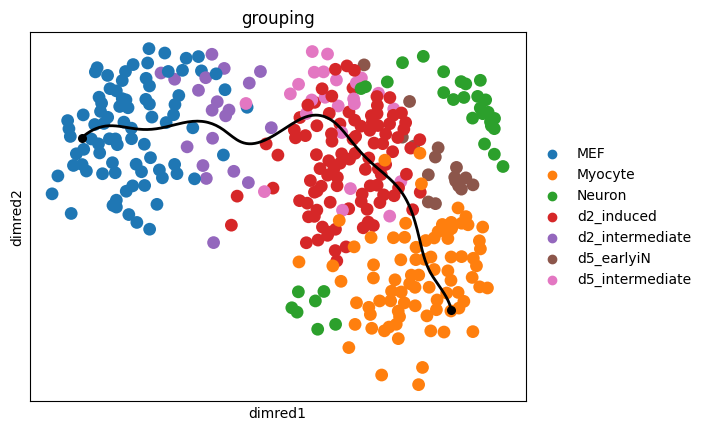

In [ ]:
# 4. 绘制轨迹(dimred+plot)
# TODO: 
# (1) pdv.wrap.add_dimred优化, 不用传入expression_source
# (2) pdv.plot.plot_dimred优化, 可一重复绘制图像
cluster_list = dataset["grouping"]
model = pdv.wrap.add_dimred(model, pdv.dimred.dimred_mds, expression_source=dataset["expression"])  # 提取降维结果
pdv.plot.plot_dimred(model, grouping=cluster_list)
logger.info("Result plotting finished")